In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [20]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


/var/folders/kb/_d2v6l3d3bbbwbj89tc22rg00000gn/T/ipykernel_56851/2390360803.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='placed', data=df, palette='Set2')


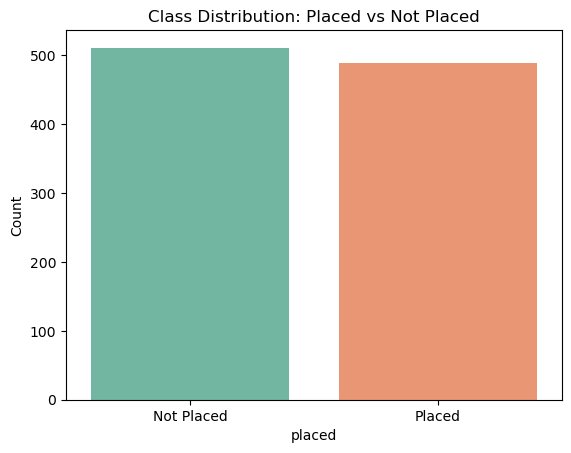

In [28]:
sns.countplot(x='placed', data=df, palette='Set2')
plt.title('Class Distribution: Placed vs Not Placed')
plt.xticks([0,1], ['Not Placed', 'Placed'])
plt.ylabel('Count')
plt.show()

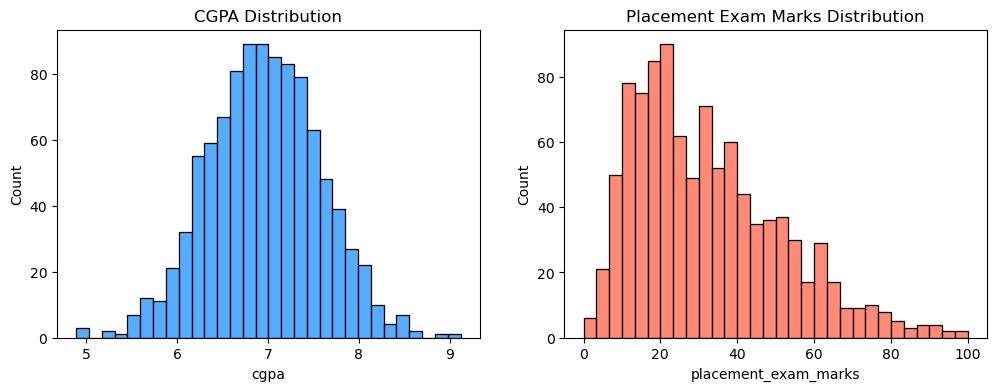

In [30]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df['cgpa'], bins=30, color='dodgerblue', ax=ax[0])
ax[0].set_title('CGPA Distribution')
sns.histplot(df['placement_exam_marks'], bins=30, color='tomato', ax=ax[1])
ax[1].set_title('Placement Exam Marks Distribution')
plt.show()